# Predict the optimum number of clusters fo Iris dataset

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [61]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
#load the dataset
df = pd.read_csv('Iris.csv')

#display the first five records
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data understanding and pre processing:

In [3]:
#rows and columns in dataset
df.shape

(150, 6)

In [4]:
#datatypes of features
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#info about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#summary statistics or five point summary for numeric variables
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
#summary statistics or five point summary for categorical variables
df.describe(include='object')

,Species
count,150
unique,3
top,Iris-versicolor
freq,50


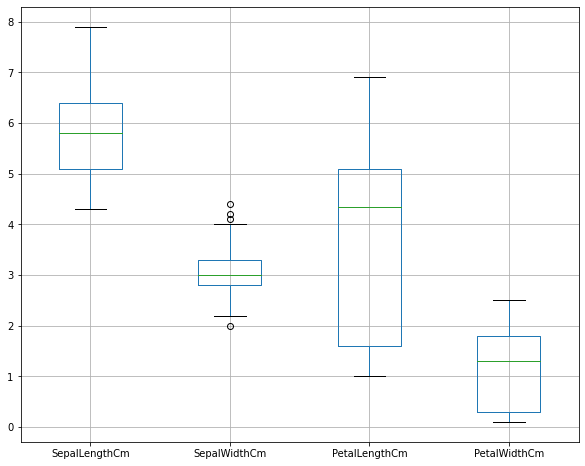

In [12]:
#checking for outliers
df.drop(['Id','Species'],axis=1).boxplot()

There is not much outliers. We can proceed with the data.

In [13]:
#number of categories in categorical variable
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [14]:
#% observations of number of categories in categorical variable
round((df['Species'].value_counts()/len(df)*100),2)

Iris-versicolor    33.33
Iris-virginica     33.33
Iris-setosa        33.33
Name: Species, dtype: float64

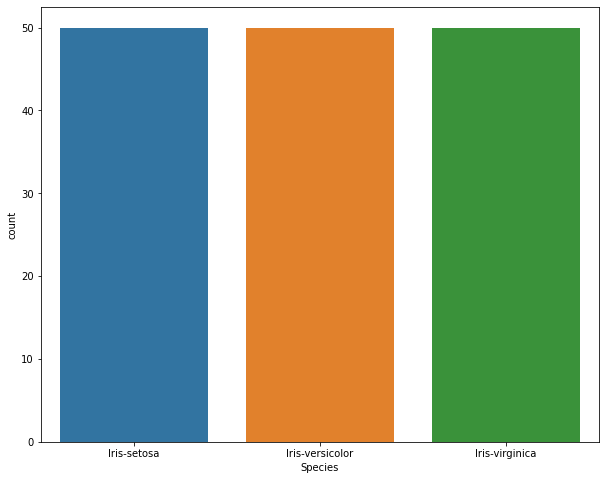

In [17]:
#countplot for each category of feature
sns.countplot(df['Species'])

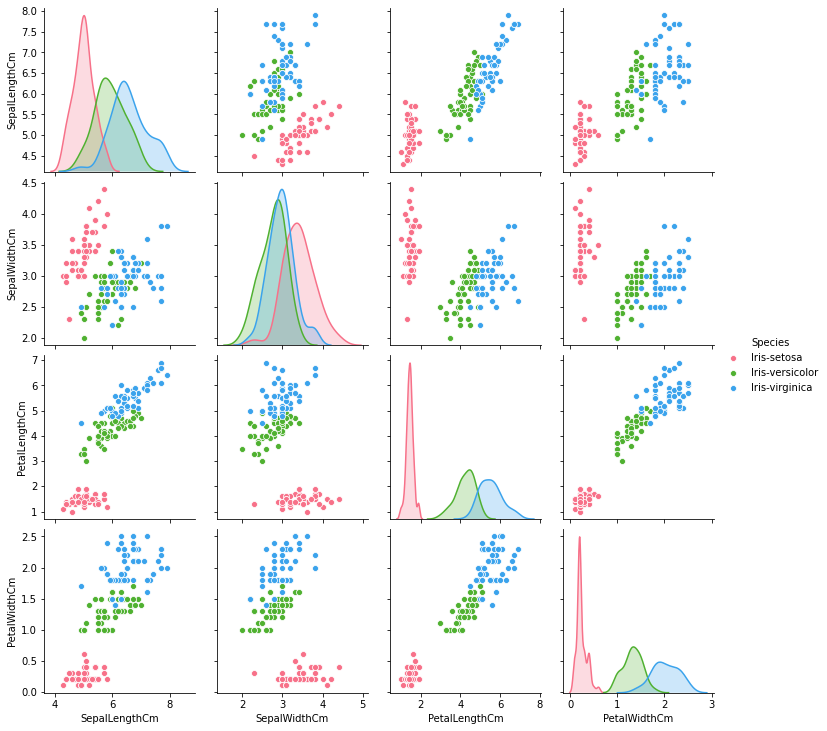

In [25]:
#visualize all the features using a pairplot
i = sns.pairplot(df, vars = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] ,hue='Species', palette='husl')
plt.show()

In [16]:
#prepare the data for further process
#Id(numeric) and species(categorical) are not needed in the model building
df_iris = df.drop(['Id','Species'],axis=1)

#display 3 records
df_iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [19]:
#scale the data
df_scaled = df_iris.apply(zscore)
df_scaled.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977


In [21]:
#find the optimal k value
cluster_range = range( 1, 11 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,141.154178
3,4,114.615507
4,5,91.002441
5,6,80.813797
6,7,70.904585
7,8,63.816048
8,9,55.033832
9,10,47.586451


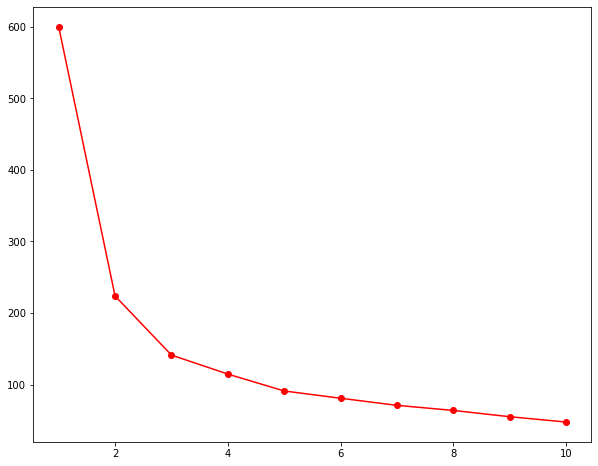

In [23]:
#plot elbow curve
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o",color='red' )

By observing the both cluster errors dataframe and elbow curve, we can choose the number of clusters(k) as 3.

In [26]:
#building kmeans with 3 clusters
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=10)
kmeans.fit(df_scaled)

#centroids for all clusters
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.014579,0.842307,-1.304878,-1.255129
1,1.135970,0.096598,0.996271,1.017172
2,-0.050220,-0.880292,0.347532,0.282063


In [31]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
df_new = df_iris.join(df_labels)

df_analysis = (df_new.groupby(['labels'] , axis=0)).head(200)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
#Original clusters and predicted clusters
print('Original Clusters :\n')
print(df['Species'].value_counts())

print('\n\n Predicted Clusters : ')
print(df_new['labels'].value_counts())

Original Clusters :

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


 Predicted Clusters : 
2    53
0    50
1    47
Name: labels, dtype: int64


Comparing Original Classes and K-Means Algorithm Classes:

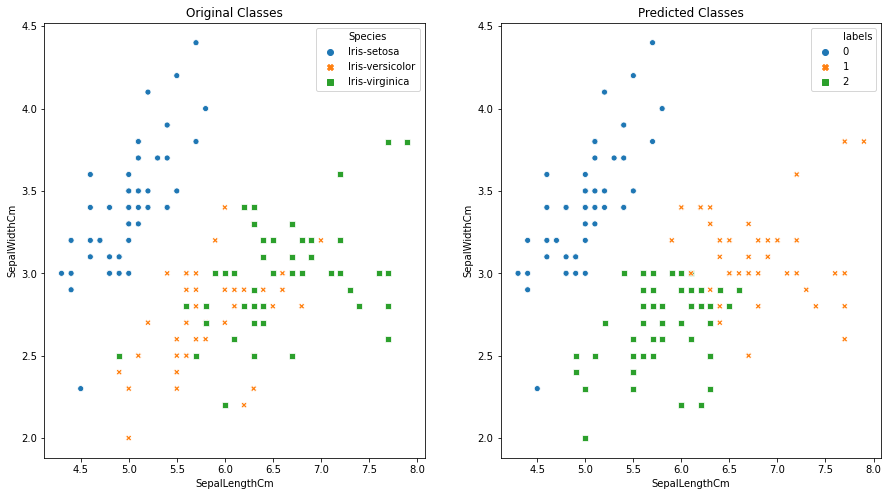

In [49]:
#visualization for x='SepalLengthCm' vs y='SepalWidthCm'
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='Species', data=df, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='labels', style='labels', data=df_new,ax=ax2)
plt.show()

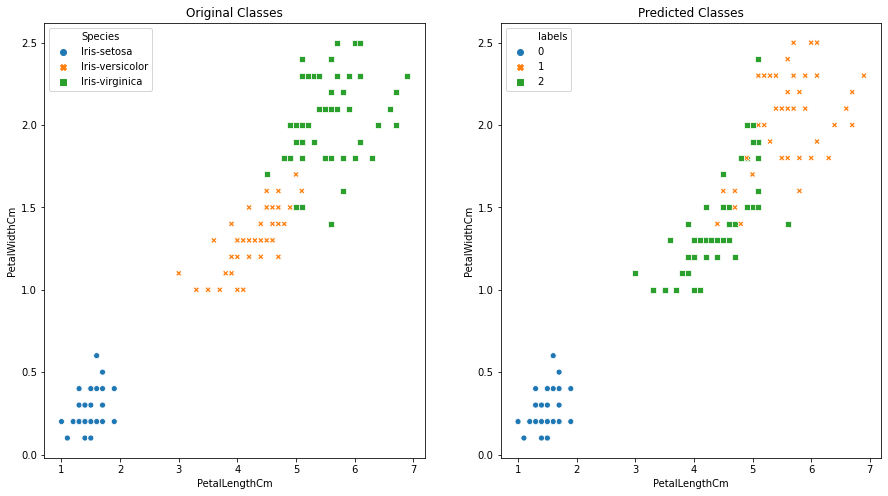

In [62]:
#visualization for x='PetalLengthCm' vs y='PetalWidthCm'
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', style='Species', data=df, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='labels', style='labels', data=df_new,ax=ax2)
plt.show()

In [ ]:
#Representation in 3D view

In [57]:
X = df.iloc[:,[0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 10)
y_kmeans = kmeans.fit_predict(X)

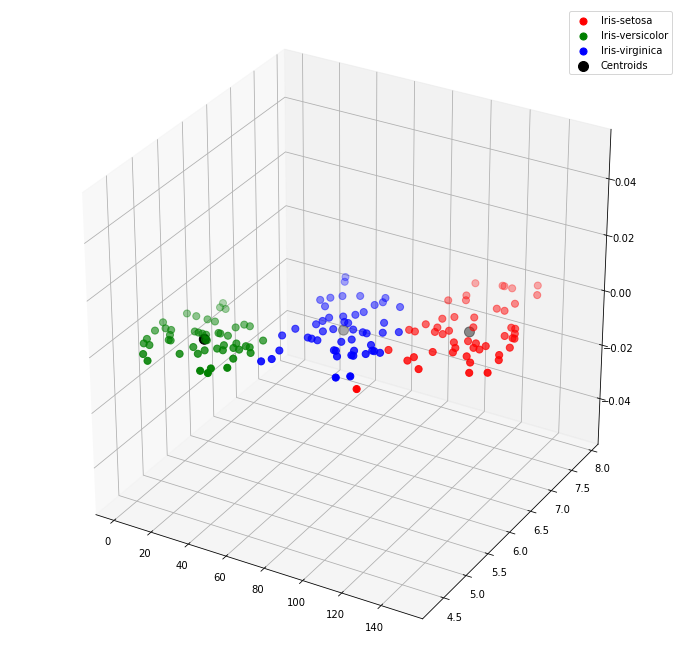

In [59]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s=50, c= 'red',label='Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s=50, c= 'green',label='Iris-versicolor')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s=50, c= 'blue',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c= 'black',label='Centroids')

plt.legend()
plt.show()